In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
from tensorflow.keras.datasets import mnist
# loading the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# shape of x_train (no, height, width) of pixels
x_train.shape
     

(60000, 28, 28)

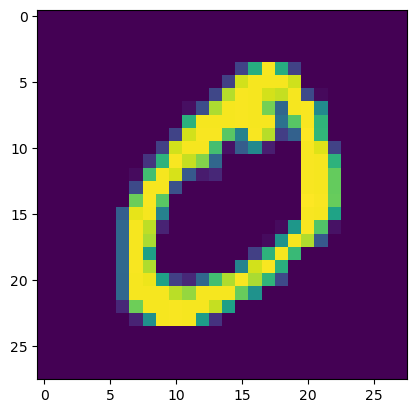

In [4]:
# to plot the image , its grey scale thats why looks like this
plt.imshow(x_train[1])
     

In [5]:
# for One-Hot encoding 
from tensorflow.keras.utils import to_categorical
     

In [6]:
# one-Hot encoding the y data
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)
     

In [7]:
# result after one-hot encoding
y_cat_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
x_train[1].max()
     

255

In [9]:
# scaling the image with values from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
# grey scale image hence 1 channel , the last number represents the channel
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
     

In [13]:
# imports for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
# creating our machine learning model
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

C:\Users\gudis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# early stopping to avoid over fitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
# training the model
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9156 - loss: 0.2819 - val_accuracy: 0.9815 - val_loss: 0.0532
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9847 - loss: 0.0474 - val_accuracy: 0.9878 - val_loss: 0.0397
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9912 - loss: 0.0273 - val_accuracy: 0.9874 - val_loss: 0.0377
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9886 - val_loss: 0.0347
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9959 - loss: 0.0128 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9875 - val_loss: 0.0483


In [17]:
losses = pd.DataFrame(model.history.history)
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.959300,0.135008,0.9815,0.053237
1,0.985500,0.045783,0.9878,0.039680
2,0.990533,0.029598,0.9874,0.037693
3,0.993567,0.020274,0.9886,0.034711
4,0.995583,0.013562,0.9883,0.040876


<Axes: >

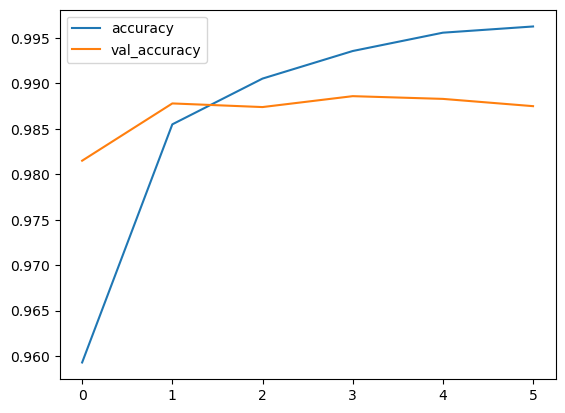

In [18]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

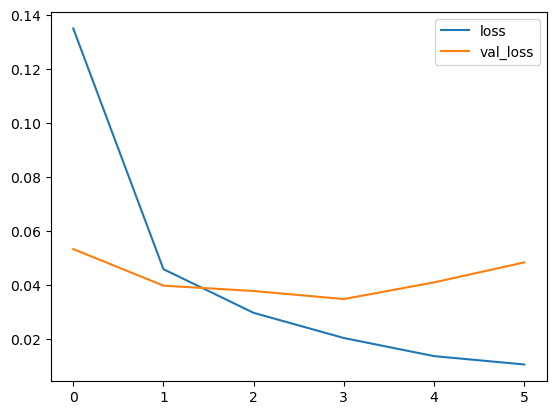

In [19]:
losses[['loss','val_loss']].plot()

In [20]:
print(model.evaluate(x_test,y_cat_test,verbose=0))

[0.0482930950820446, 0.987500011920929]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
     

In [43]:
x = [[np.nan, 11], 
     [4,      np.nan], 
     [8,      2],
     [np.nan, 1]]
     
     

In [44]:

scaler = StandardScaler()

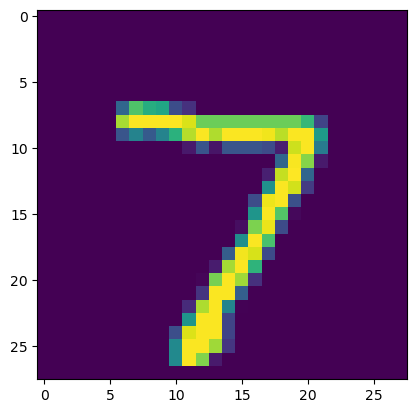

In [38]:
my_num = x_test[0]
plt.imshow(my_num.reshape(28,28))

In [50]:
# predicting on a image
model.predict_classes(my_num.reshape(1,28,28,1))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [51]:
x_fit = scaler.fit(x)

In [52]:
print(x_fit)

StandardScaler()


In [53]:

x_transform = scaler.transform(x)

In [54]:
print(x_transform)

[[        nan  1.4083737 ]
 [-1.                 nan]
 [ 1.         -0.59299945]
 [        nan -0.81537425]]


In [55]:
x_fit_transform = scaler.fit_transform(x)

In [56]:
print(x_fit_transform)

[[        nan  1.4083737 ]
 [-1.                 nan]
 [ 1.         -0.59299945]
 [        nan -0.81537425]]


In [57]:
x_train : x_fit_transform
x_test : x_transform